Импортируем необходимые модули

In [6]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

Загружаем датасет

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Смотрим описательную статистики по отдельным полям датасета

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


# Data quality assessment

Смотрим распределение значений в поле PassengerId

In [4]:
data['PassengerId'].value_counts()

0        1
66650    1
66672    1
66671    1
66670    1
        ..
33331    1
33330    1
33329    1
33328    1
99999    1
Name: PassengerId, Length: 100000, dtype: int64

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PassengerId'>

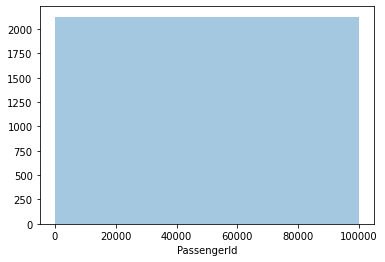

In [7]:
sns.distplot(data['PassengerId'], kde=False)

In [24]:
len(data[data['PassengerId'].isna()])

0

Значения PassengerId соответствуют идентификатору пассажира,  распределены равномерно, пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Survived

In [8]:
data['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

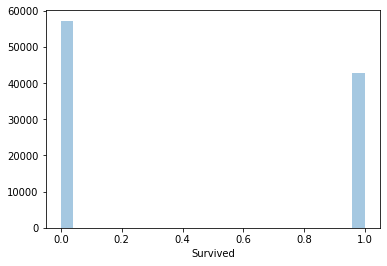

In [9]:
sns.distplot(data['Survived'], kde=False)

In [23]:
len(data[data['Survived'].isna()])

0

Значения Survived распределены по двум категориям 0 (не выжил) и 1 (выжил), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Pclass

In [11]:
data['Pclass'].value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass'>

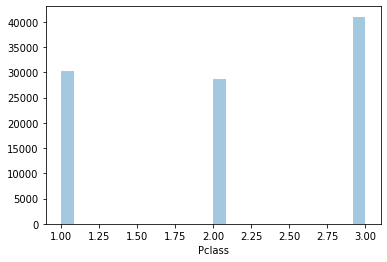

In [12]:
sns.distplot(data['Pclass'], kde=False)

In [26]:
len(data[data['Pclass'].isna()])

0

Значения Pclass распределены по трем категориям, обозначающим класс каюты пассажира (1,2,3), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Age

In [13]:
data['Age'].value_counts()

25.0    2354
23.0    2345
26.0    2320
24.0    2298
27.0    2088
        ... 
14.5       1
74.5       1
78.5       1
13.5       1
87.0       1
Name: Age, Length: 173, dtype: int64

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

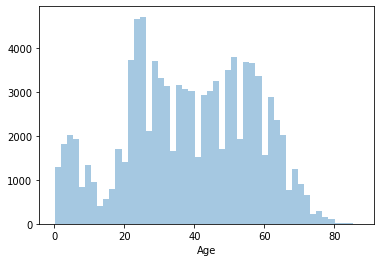

In [22]:
sns.distplot(data['Age'], kde=False)

In [25]:
len(data[data['Age'].isna()])

3292

Значения Age распределены бимодально и обозначают возраст пассажира. Имеется 3292 пропуска. Пропуски можно заполнить медианным или модальным значением. После этого данные в этом поле можно считать качественными.

Смотрим распределение значений в поле SibSp

In [27]:
data['SibSp'].value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp'>

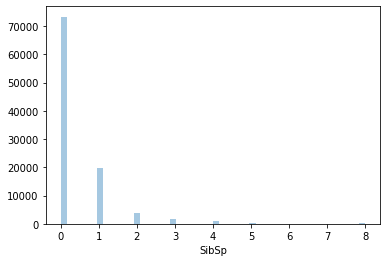

In [28]:
sns.distplot(data['SibSp'], kde=False)

In [29]:
len(data[data['SibSp'].isna()])

0

Значения SibSp экспоненциально распределены по семи категориям, обозначающим количество супргов или братьев/сестер пассажира (0,1,2,3,4,5,8), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Parch

In [30]:
data['Parch'].value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch'>

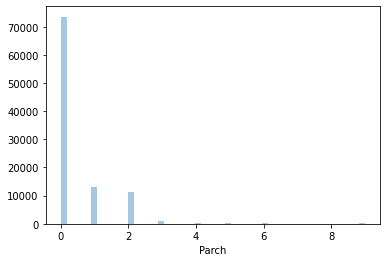

In [31]:
sns.distplot(data['Parch'], kde=False)

In [32]:
len(data[data['Parch'].isna()])

0

Значения Parch экспоненциально распределены по восьми категориям, обозначающим количество родителей или детей пассажира (0,1,2,3,4,5,6,9), пропуски отсутствуют. Данные в этом поле можно считать качественными.

Смотрим распределение значений в поле Ticket

In [34]:
data['Ticket'].value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

In [36]:
len(data[data['Parch'].isna()])

0

Значения Parch распределены по 75331 категориям, обозначающим номер билета, пропуски отсутствуют. Данные в этом поле можно считать качественными, но скорее всего бесполезными для дальнейшего анализа ввиду избыточного количества значений 

Смотрим распределение значений в поле Fare

In [38]:
data['Fare'].value_counts()

9.85      87
9.27      87
9.79      86
9.20      85
9.18      83
          ..
297.17     1
191.64     1
39.50      1
214.92     1
4.06       1
Name: Fare, Length: 15935, dtype: int64

<AxesSubplot:xlabel='Fare'>

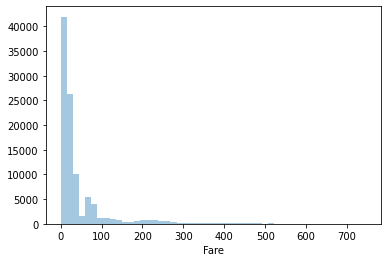

In [39]:
sns.distplot(data['Fare'], kde=False)

In [40]:
len(data[data['Fare'].isna()])

134

Значения Fare распределены экспоненциально и обозначают стоимость билета. Имеется 134 пропуска. Пропуски можно заполнить медианным или модальным значением. После этого данные в этом поле можно считать качественными.

# Data exploration

# Summary